# Conjugacy in the Logistic Family
## The case of $\mu \in (1,2)$.

Pick two parameters in the interval $(1,2)$. We will find an explicit topological conjugacy between the two maps restricted to $[0,1]$. (It is not hard to extend the conjugacy outside the interval, but this will be enough to understand how to build such conjugacies.)

In [1]:
mu = 4/3
nu = 7/4

In [2]:
F(x) = mu*x*(1-x)
F

x |--> -4/3*(x - 1)*x

In [3]:
G(x) = nu * x * (1-x)
G

x |--> -7/4*(x - 1)*x

Below we plot $F$ with the diagonal over the interval $[0,1]$.

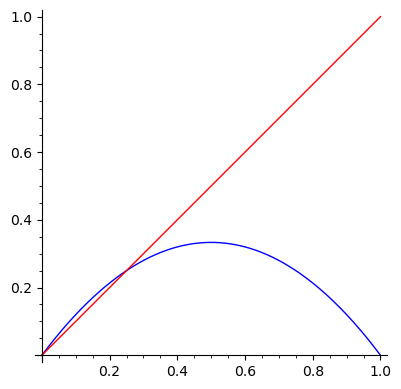

In [4]:
plot(F, 0, 1, aspect_ratio=1) + plot(x,(x, 0, 1), color="red")

Here is the plot of $G$:

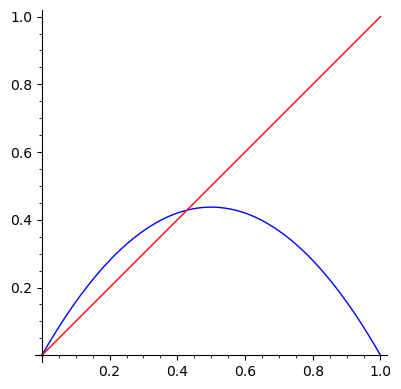

In [5]:
plot(G, 0, 1, aspect_ratio=1) + plot(x,(x, 0, 1), color="red")

Recall that these maps have fixed points at zero and at $p_\mu=\frac{\mu-1}{\mu}$.

In [6]:
p = (mu-1)/mu
p

1/4

Check that $p$ is fixed by $F$:

In [7]:
bool(F(p) == p)

True

We'll use $q$ for the corresponding fixed point of $G$:

In [8]:
q = (nu-1)/nu
print("q = " + str(q))
bool(G(q) == q)

q = 3/7


True

Notice that $F$ restricts to a map
$$F|_{(0,p)} : (0,p) \to (0,p),$$
and this map is a homeomorphism.

Furthermore, we have $F(x)>x$ for $x \in (0,p)$. Therefore, all orbits in $(0,p)$ converge monotonically to $p$. 

We choose any point $a \in (0,p)$ to construct a <i>fundamental domain</i> $\big[a,b\big)$ for $F|_{(0,p)}$. This means that for every point $x \in (0,p)$ there is a unique $n \in {\mathbb Z}$ such that 
$$F|_{(0,p)}^n(x) \in [a,b).$$
To do this we must take $b=F(a)$.

In [9]:
a = 1/8
b = F(a)
b

7/48

Now we find a fundamental domain $[c,d)$ for the restriction $G|_{(0,q)}$.

In [10]:
c = 1/4
d = G(c)
d

21/64

## The first stage of the topological conjugacy

We can now produce a topological conjugacy $h_1:[0,p] \to [0,q]$, which should satisfy $G \circ h_1 = h_1 \circ F$. 

To do this, we first select a homeomorphism $h_0:[a,b) \to [c,d)$ between the fundamental domains. For simplicity, we'll just use an affine linear map (though any orientation-preserving homeomorphism will work):

In [11]:
h0(x) = (d-c)/(b-a)*(x-a) + c
h0

x |--> 15/4*x - 7/32

Let's check that this does what we want:

In [12]:
bool(h0(a)==c)

True

In [13]:
bool(h0(b)==d)

True

The topological conjugacy $h_1$ must satisfy $0 \mapsto 0$ and $p \mapsto q$. 

For $x \in (0,p)$, we will be defining
$$h_1(x) = G^{-n} \circ h_0 \circ F^n(x)$$
where $n$ is the integer such that $F^n(x) \in [a,b)$. Computing this $n$ and $F^n(x)$ is not too difficult. Basically, if $x<a$, then we continue applying $F$ until the point lies in $[a,b)$, and if $x>b$ we continue applying $F^{-1}$ until the point lies in $[a,b)$. 

For this second possibility, we need to an inverse of $F$. There really are two inverses, and sage can actually compute them:

In [14]:
y = var('y') # Define a new variable. The variable $x$ was defined automatically.
solve(F(x) == y, x)

[x == -1/2*sqrt(-3*y + 1) + 1/2, x == 1/2*sqrt(-3*y + 1) + 1/2]

This will be our left and right inverses:

In [15]:
FLinv(y) = -1/2*sqrt(-3*y + 1) + 1/2
FRinv(y) = 1/2*sqrt(-3*y + 1) + 1/2

Here is a sanity check:

In [16]:
bool( F(FLinv(1/3))==1/3 )

True

Let's do the same for $G$:

In [17]:
solve(G(x) == y, x)

[x == -1/14*sqrt(-112*y + 49) + 1/2, x == 1/14*sqrt(-112*y + 49) + 1/2]

In [18]:
GLinv(y) = -1/14*sqrt(-112*y + 49) + 1/2
GRinv(y) = 1/14*sqrt(-112*y + 49) + 1/2

Now lets turn our attention to computing $n$ and $F^n(x)$. Let's suppose that $x<a$. Let's pick a particular example and try it.

In [19]:
x = 1/10
bool( x<a )

True

The idea is to repeat applying $F$ until our point becomes bigger than or equal to $a$. At that moment it will lie in $[a,b)$.

In [20]:
x = F(x)
n = 1 # We've applied F once

Now we need to check if $x$ is still less than $a$.

In [21]:
bool( x<a )

True

We have to repeat it again:

In [22]:
x = F(x)
n = n + 1 # We applied $F$ one more time.

Now we check again:

In [23]:
bool(x<a)

False

To be sure, lets see if $x \in [a,b)$:

In [24]:
bool( x>=a and x<b)

True

To perform these actions automatically, we can use a while loop:

In [25]:
x0 = 1/10
x = x0
n = 0
while x < a:
    x = F(x)
    n = n+1
print(f"F^{n}({x0})={x} lies in the interval.")

F^2(1/10)=88/625 lies in the interval.


In [26]:
x0 = 1/20
x = x0
n = 0
while x < a:
    x = F(x)
    n = n+1
print(f"F^{n}({x0})={x} lies in the interval.")

F^5(1/20)=7919123083773007577909379937206597419/57525317769865226000547409057617187500 lies in the interval.


We remark that we are doing exact arithmetic. If our input is floating point, we will get more readable answers:

In [27]:
x0 = 0.01
x = x0
n = 0
while x < a:
    x = F(x)
    n = n+1
print(f"F^{n}({x0})={x} lies in the interval.")

F^11(0.0100000000000000)=0.136250844001924 lies in the interval.


Here is a function implementing the full topological conjugacy $h_1:[0,p] \to [0,q]$:

In [28]:
def h1(x0):

    # The conjugacy sends 0 to 0
    if x0==0:
        return 0

    # The conjugacy sends p to q
    if x0==p:
        return q

    # Ensure that x0 lies in the interval [0,p]
    if x0<0 or x0>p:
        # This is mainly to avoid infinite loops because of bad input!
        # It will cause an error when the x0 is not in [0, p]
        raise ValueError("The point x0 is not in [0,p]")

    if x0 >= a and x0 < b:
        # We are already in the interval
        return h0(x0)
        
    if x0 < a:
        x = x0
        n = 0
        while x < a:
            x = F(x)
            n = n+1
        # At this point x=F^n(x_0) and we know what $n$ is.
        # Apply h0:
        z = h0(x)
        # Now we need to apply G^-n.
        for i in range(n): # This repeats a statement n times.
            z = GLinv(z) # This applies G^-1 once to z.
        return z

    if x0 >= b:
        # We carry out the same thing if x0 >= b, but apply inverses.
        x = x0
        n = 0
        while x >= b:
            x = FLinv(x)
            n = n+1
        # At this point x=F^-n(x_0) and we know what $n$ is.
        # Apply h0:
        z = h0(x)
        # Now we need to apply G^n.
        for i in range(n): # This repeats a statement n times.
            z = G(z) # This applies G^-1 once to z.
        return z       

Let's see what $h_1$ looks like:

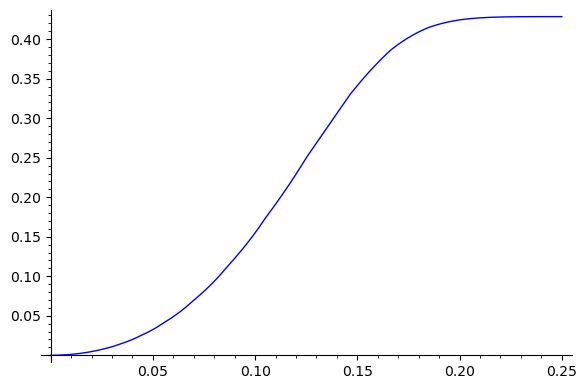

In [29]:
plot(h1, 0, p)

Let's check the conjugacy equation:

In [30]:
x = 0.001
print( G(h1(x)) )
print( h1(F(x)) )

0.0000215300290355477
0.0000215300290355436


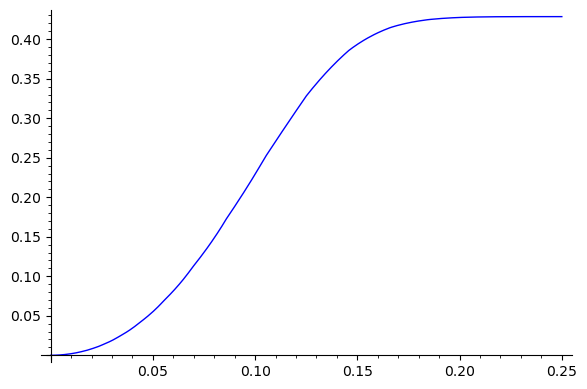

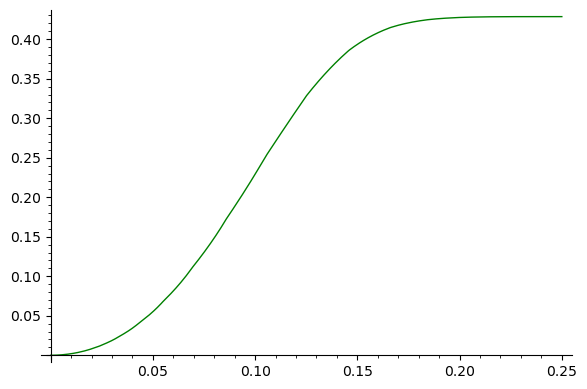

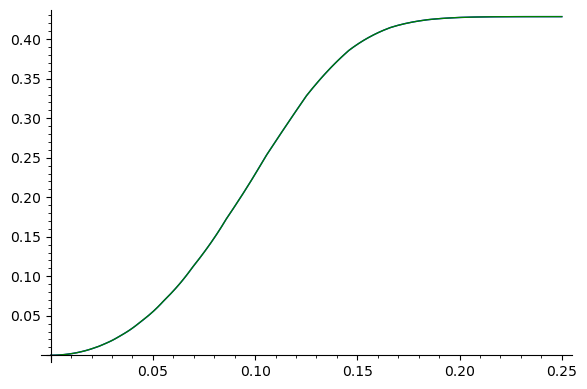

In [31]:
plt1 = plot(lambda x: G(h1(x)), 0, p)
plt2 = plot(lambda x: h1(F(x)), 0, p, color="green")
show(plt1)
show(plt2)
plt1 + plt2

Note that $h_1$ is continuous but not differentiable (despite the apparent smoothness!):

In [32]:
def approximate_derivative_of_h1(x, epsilon=0.0001):
    return (h1(x+epsilon)-h1(x)) / epsilon

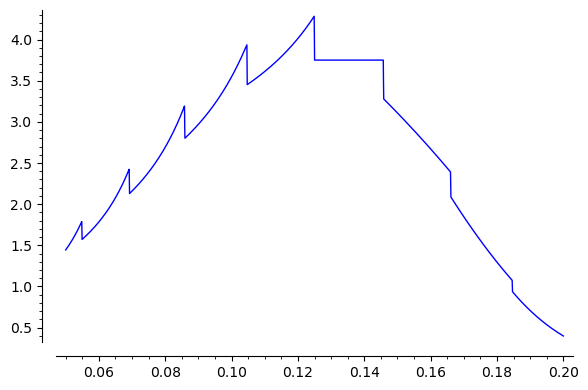

In [33]:
plot(approximate_derivative_of_h1,0.05,0.2)

# The second stage:

The point $1/2$ is special because it is the critical point. Concretely, $F(1/2)$ is the only point with only one preimage. The same holds for $G$. So, $1/2$ must be sent to $1/2$ by a conjugacy.

Observe that $(p,\frac{1}{2}] \subset W^s(p)$. This is because for $x \in (p, \frac{1}{2}]$, we have $F(x) \in (p, \frac{1}{2}]$ and $F(x) < x$.

We set $a_1=F(\frac{1}{2})$ and $b_1=G(\frac{1}{2})$:

In [34]:
a1 = F(1/2)
print(f"a1 = {a1}")
b1 = G(1/2)
print(f"b1 = {b1}")

a1 = 1/3
b1 = 7/16


Now we define a homeomorphism between the fundamental domains: $h_2:(a_1, \frac{1}{2}] \to (b_1, \frac{1}{2}]$:

In [35]:
x = var('x')
h2(x) = (b1-1/2)/(a1-1/2) * (x-a1) + b1
h2

x |--> 3/8*x + 5/16

In [36]:
bool(h2(1/2)==1/2)

True

In [37]:
bool(h2(a1)==b1)

True

We now extend the previous conjugacy $h_1:[0,p] \to [0,q]$ to a conjugacy $h_3:[0,\frac{1}{2}] \to [0, \frac{1}{2}]$:

In [38]:
def h3(x0):

    if x0 <= p:
        return h1(x0)
    
    if x0 > 1/2:
        # This is mainly to avoid infinite loops because of bad input!
        # It will cause an error when the x0 is not in [0, p]
        raise ValueError("The point x0 is not in [0,1/2]")

    # At this point we know that p < x <= 1/2
    x = x0
    n = 0
    while x <= a1:
        x = FLinv(x)
        n = n+1
    # At this point x=F^-n(x_0) and we know what $n$ is.
    # Apply h2:
    z = h2(x)
    # Apply G n times:
    for i in range(n): # This repeats a statement n times.
        z = G(z) # This applies G^-1 once to z.
    return z

Here we plot h3:

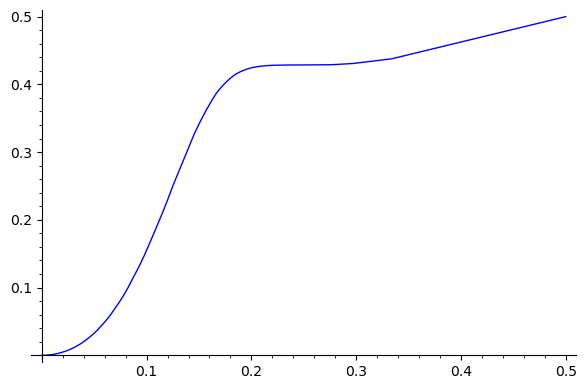

In [39]:
plot(h3, 0, 1/2)

Here we graphically check the conjugacy equation:

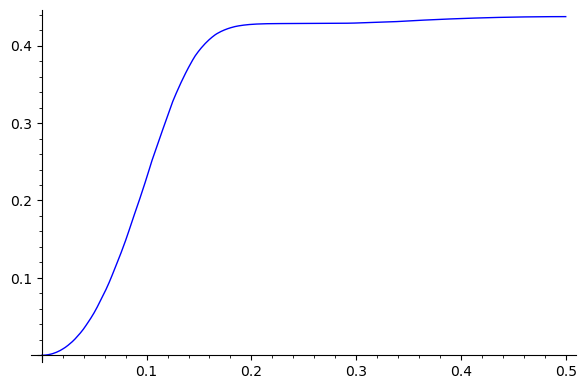

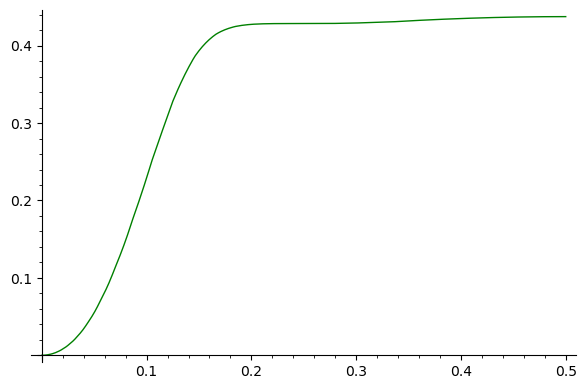

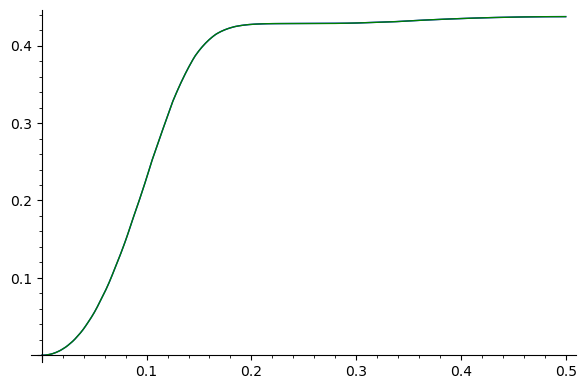

In [40]:
plt1 = plot(lambda x: G(h3(x)), 0, 1/2)
plt2 = plot(lambda x: h3(F(x)), 0, 1/2, color="green")
show(plt1)
show(plt2)
plt1 + plt2

We look at the derivative for fun:

In [41]:
def approximate_derivative_of_h3(x, epsilon=0.0001):
    return (h3(x+epsilon)-h3(x)) / epsilon

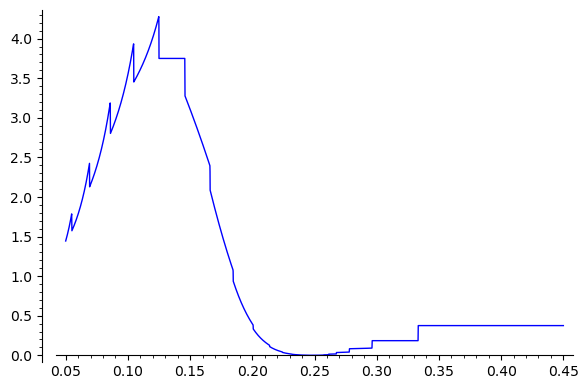

In [42]:
plot(approximate_derivative_of_h3,0.05,0.45)

An interesting thing to look at is what is happening for $h$ near the fixed point $p$. Recall that we showed the conjugacy can not be a $C^1$ homeomorphism in a neighborhood of $p$. From the above graph, it looks like $h'(p)=0$, which means that $h$ cannot have a differentiable inverse. Here is a graph of $h$ in a small neighborhood of $p$:

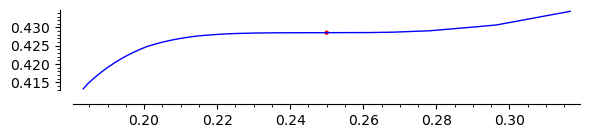

In [43]:
plot(h3, p-1/15, p+1/15, aspect_ratio=1) + point2d([(p,q)], color="red")

# The third stage:

Now we extend to the full interval $[0,1]$.

Suppose that $x \in (\frac{1}{2},1]$. We'll want out conjugacy $h$ to send $x$ to some point $y = h(x) \in (\frac{1}{2},1]$. Observe that $F(x)=F(1-x)$ and $G(y)=G(1-y)$. Our map $h_3$ defined above satisfies
$$h_3 \circ F(1-x) = G \circ h_3(1-x).$$
We claim that if we define 
$$h_4(x) = \begin{cases}
h_3(x) & \text{if }x \in [0, \frac{1}{2}] \\
1-h_3(1-x) & \text{if } x \in (\frac{1}{2},1] 
\end{cases}$$
then we'll get a conjugacy. To see this fix an $x > \frac{1}{2}$. Then $h_4(x)>\frac{1}{2}$ and so
$$G \circ h_4(x) = G\big(1-h_3(1-x)\big)=G\big(h_3(1-x)\big)$$
and since $F(x)<\frac{1}{2}$ we have
$$h_4 \big(F(x)\big)=h_3 \circ F(x)= h_3 \circ F(1-x) = G \circ h_3(1-x).$$
Thus $G \circ h_4(x) = h_4 \circ F(x)$ on $[0,1]$.



In [44]:
def h4(x0):

    # We return an error if x0 is not in [0, 1].
    if x0 < 0 or x0 > 1:
        # This is mainly to avoid infinite loops because of bad input!
        # It will cause an error when the x0 is not in [0, p]
        raise ValueError("The point x0 is not in [0, 1]")

    # We apply h_3 if x_0 is in [0, 1/2]
    if x0 <= 1/2:
        return h3(x0)
    else:
        return 1-h3(1-x0)

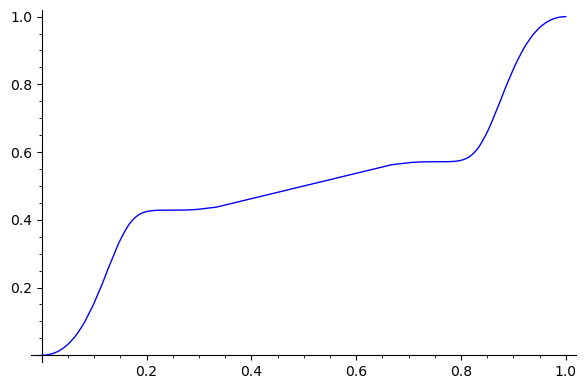

In [45]:
plot(h4, 0, 1)

Graphically checking the conjugacy:

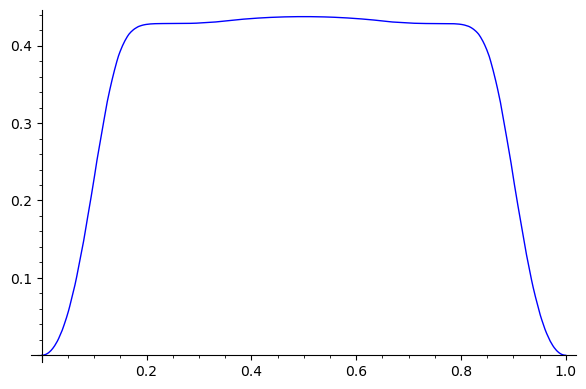

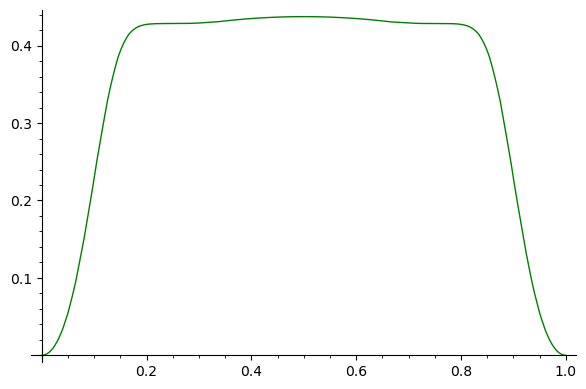

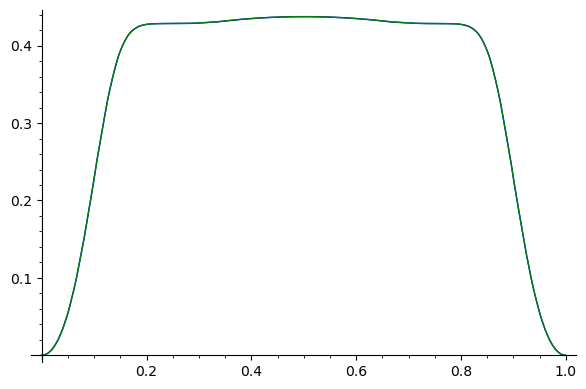

In [46]:
plt1 = plot(lambda x: G(h4(x)), 0, 1)
plt2 = plot(lambda x: h4(F(x)), 0, 1, color="green")
show(plt1)
show(plt2)
plt1 + plt2